### Comparing the performance the updated model trained using 1M segments vs 100K segments by Adam with the older tensorflow model trained with 300K segments.


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

from sklearn.datasets import load_svmlight_file
from sklearn.externals import joblib
import argparse
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report

In [4]:
result = pd.read_csv('~/all_2k_prediction.out.label.prediction_combined',sep=' ',header=None,names=['name','length','probability','prediction','vfam','pfam','diamond','label',
                                                                                      'score_euk_non_euk','pred_euk_non_euk','score_non_euk_virus','pred_non_euk_virus',
                                                                                      'score_virus_non_virus','pred_virus_non_virus'])

In [5]:
result.head()

,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,score_non_euk_virus,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus
0,NODE_1_length_91451_cov_163.114_g0_i0,91451,0.000375,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.996004,1.0,0.001954,0.0
1,NODE_2_length_74096_cov_303.895_g1_i0,74096,0.000088,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.995278,1.0,0.000529,0.0
2,NODE_3_length_66420_cov_268.59_g1_i1,66420,0.000041,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.996629,1.0,0.000761,0.0
3,NODE_4_length_61338_cov_317.585_g2_i0,61338,0.000056,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.991967,1.0,0.000477,0.0
4,NODE_5_length_59036_cov_197.701_g0_i1,59036,0.000040,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.990354,1.0,0.000617,0.0


In [6]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [7]:
ncbi = NCBITaxa()


In [8]:
# ncbi.update_taxonomy_database()

In [9]:
ncbi.get_rank([-2])

{}

In [10]:
megan_annot = pd.read_csv('./Micromonas/all_2k_contigs.fa.diamond-ex-all_tax_ID.txt',sep='\t',header=None,names=['name','tax_id'])



In [36]:
### Using MEGAN annotation to check model performance 

def get_top_label(tax_id):
    try:
        lineage = ncbi.get_lineage(tax_id)
    except:
        return "N/A"
    for i in lineage:
        if i == 2759:
            return "Eukaryota"
        elif i == 10239:
            return "Virus"
        elif i == 2157:
            return "Archaea"
        elif i == 2:
            return "Bacteria"
        elif i == 12884:
            return "Viroids"
        elif i == 28384:
            return "other"
        elif i == 12908:
            return "unclassified"
    else:
        return "N/A"

def get_ranks(tax_id):
    ranks = ncbi.get_rank([tax_id])
    try:
        return ranks[tax_id]
    except:
        return tax_id
    
def get_name(tax_id):
    ranks = ncbi.get_taxid_translator([tax_id])
    try:
        return ranks[tax_id]
    except:
        return tax_id

# get MEGAN annotation results

megan_annot = pd.read_csv('./Micromonas/all_2k_contigs.fa.diamond-ex-all_tax_ID.txt',sep='\t',header=None,names=['name','tax_id'])

megan_annot['rank'] = megan_annot['tax_id'].apply(get_ranks)
megan_annot['tax_name']= megan_annot['tax_id'].apply(get_name)
megan_annot['top_label']= megan_annot['tax_id'].apply(get_top_label)


In [35]:
list(ncbi.get_rank([1]).values())

['no rank']

In [68]:
megan_annot.to_csv('./Micromonas/all_2k_contigs.fa.diamond-ex-all_tax_ID.txt.annot',sep='\t')

In [37]:
megan_annot.head()

,name,tax_id,rank,tax_name,top_label
0,NODE_646_length_5889_cov_28.079_g448_i0,1,no rank,root,N/A
1,NODE_667_length_5857_cov_28.2491_g448_i1,1,no rank,root,N/A
2,NODE_671_length_5843_cov_18.2623_g465_i0,1,no rank,root,N/A
3,NODE_806_length_5513_cov_46.199_g556_i0,1,no rank,root,N/A
4,NODE_807_length_5513_cov_37.6629_g556_i1,1,no rank,root,N/A


In [38]:
new_table = pd.merge(result,megan_annot, on=['name'])

In [39]:
new_table.head()

,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,score_non_euk_virus,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus,tax_id,rank,tax_name,top_label
0,NODE_1_length_91451_cov_163.114_g0_i0,91451,0.000375,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.996004,1.0,0.001954,0.0,1236,class,Gammaproteobacteria,Bacteria
1,NODE_2_length_74096_cov_303.895_g1_i0,74096,0.000088,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.995278,1.0,0.000529,0.0,254161,species,Pseudomonas pachastrellae,Bacteria
2,NODE_3_length_66420_cov_268.59_g1_i1,66420,0.000041,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.996629,1.0,0.000761,0.0,254161,species,Pseudomonas pachastrellae,Bacteria
3,NODE_4_length_61338_cov_317.585_g2_i0,61338,0.000056,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.991967,1.0,0.000477,0.0,286,genus,Pseudomonas,Bacteria
4,NODE_5_length_59036_cov_197.701_g0_i1,59036,0.000040,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.990354,1.0,0.000617,0.0,286,genus,Pseudomonas,Bacteria


In [40]:
prediction_300k = pd.read_csv('/global/projectb/scratch/qpzhang/TARA/Libsvm/ViCA2/all_2k_contigs.fa.prediction.Adam')

In [41]:
prediction_adam = pd.read_csv('/global/projectb/scratch/qpzhang/TARA/Libsvm/ViCA2/all_2k_contigs.fa.prediction.1M_new')

In [42]:
prediction_adam.head()

,ID,Class,Class_id,Prob_class_0,Prob_class_1,Prob_class_2,Prob_class_3
0,NODE_10000_length_2000_cov_95.909_g6946_i0,3,3,0.021495,1.915236e-03,9.331824e-04,0.975657
1,NODE_10000_length_2048_cov_10.8329_g7692_i0,3,3,0.005805,5.705581e-05,1.474175e-04,0.993991
2,NODE_10000_length_2108_cov_40.585_g7688_i0,3,3,0.000002,1.378866e-09,1.581349e-08,0.999998
3,NODE_10000_length_2114_cov_17.7008_g7479_i0,3,3,0.000252,8.563400e-05,1.848443e-05,0.999644
4,NODE_10000_length_2132_cov_22.4521_g7241_i0,1,1,0.000017,9.539825e-01,7.859741e-08,0.046000


In [43]:
prediction_adam.groupby('Class').describe()

Class_id                                    Prob_class_0            \
          count mean  std  min  25%  50%  75%  max        count      mean   
Class                                                                       
0       25984.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      25984.0  0.724670   
1       27221.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      27221.0  0.023249   
2          21.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0         21.0  0.019477   
3      160358.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     160358.0  0.038752   

         ...    Prob_class_2           Prob_class_3                      \
         ...             75%       max        count      mean       std   
Class    ...                                                              
0        ...        0.022200  0.157081      25984.0  0.175443  0.133476   
1        ...        0.000012  0.119974      27221.0  0.070493  0.119092   
2        ...        1.000000  1.000000         21.0  0.045909  0.088688   
3        ...        0.001210  0.243533     160358.0  0.937465  0.126815   

                                                                 
                min           25%       50%       75%       max  
Class                                                            
0      6.935089e-05  5.727035e-02  0.147544  0.278886  0.497957  
1      0.000000e+00  3.914311e-04  0.007034  0.082659  0.499408  
2      6.078228e-17  2.764050e-07  0.000036  0.019434  0.278858  
3      3.230318e-01  9.555361e-01  0.997928  0.999885  1.000000  

[4 rows x 40 columns]

In [44]:
prediction_adam_subset = prediction_adam[['ID','Prob_class_0']]

In [45]:
prediction_adam_subset.rename(index=str,columns={"ID": "name"},inplace=True)

In [46]:
prediction_adam_subset.rename(index=str,columns={"Prob_class_0": "1M_prediction"},inplace=True)



In [47]:
prediction_300k_subset = prediction_300k[['ID','Prob_class_0']]

In [48]:
prediction_300k_subset.rename(index=str,columns={"ID": "name"},inplace=True)

In [49]:
prediction_300k_subset.rename(index=str,columns={"Prob_class_0": "100k_prediction"},inplace=True)

In [50]:
new_table_300k_joined = pd.merge(new_table,prediction_300k_subset, how='left',on=['name'])

In [51]:
new_table_300k_adam_joined = pd.merge(new_table_300k_joined,prediction_adam_subset, how='left',on=['name'])

### 7041 contigs as ground-truth virus-related, with hits to virus-related domains, or annotated as virus by MEGAN based on BlastX/Diamond alignment

### 208302 contigs with length >=2k, in TARA


In [52]:
new_table_300k_adam_joined["non_euk_label"] = (new_table_300k_adam_joined.top_label!='Eukaryota')

In [53]:
new_table_300k_adam_joined.head()

,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,...,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus,tax_id,rank,tax_name,top_label,100k_prediction,1M_prediction,non_euk_label
0,NODE_1_length_91451_cov_163.114_g0_i0,91451,0.000375,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,...,1.0,0.001954,0.0,1236,class,Gammaproteobacteria,Bacteria,0.000245,9.194513e-19,True
1,NODE_2_length_74096_cov_303.895_g1_i0,74096,0.000088,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,...,1.0,0.000529,0.0,254161,species,Pseudomonas pachastrellae,Bacteria,0.000019,4.935380e-19,True
2,NODE_3_length_66420_cov_268.59_g1_i1,66420,0.000041,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,...,1.0,0.000761,0.0,254161,species,Pseudomonas pachastrellae,Bacteria,0.000052,4.259754e-14,True
3,NODE_4_length_61338_cov_317.585_g2_i0,61338,0.000056,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,...,1.0,0.000477,0.0,286,genus,Pseudomonas,Bacteria,0.000032,9.107938e-19,True
4,NODE_5_length_59036_cov_197.701_g0_i1,59036,0.000040,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,...,1.0,0.000617,0.0,286,genus,Pseudomonas,Bacteria,0.000037,6.936213e-15,True


In [54]:
new_table_300k_adam_joined["micromonas_label"] = (new_table_300k_adam_joined.tax_name=='Micromonas') |(new_table_300k_adam_joined.tax_name=='Micromonas pusilla CCMP1545')|(
        new_table_300k_adam_joined.tax_name=='Micromonas commoda')


#### "no rank" does not equal "no annotation"

In [55]:
def convert_top_label(top_label):
    if top_label == 'N/A':
        return 'no annotation'
    else:
        return 'with annotation'

In [56]:
new_table_300k_adam_joined['annotation_label'] = new_table_300k_adam_joined['top_label'].map(convert_top_label)

### Split the TARA contigs into 3 categories

- "Virus" has virus-related domain hits or annotated as "virus" by MEGAN
- "Non-virus" , no virus-related domain hits, annotated as some non-virus taxonomical group by MEGAN 
- "Unknown",  no virus-related domain hits, not annotated into any taxonomical group by MEGAN, top_label as "N/A"

#### subsample "non-virus" and "unknown" to have same number of "Virus" contigs - 6913

In [57]:
# "non-virus" data frame... non-virus and with annotation by MEGAN
df_nonvirus = new_table_300k_adam_joined[new_table_300k_adam_joined.label==0.0][new_table_300k_adam_joined['annotation_label']== 'with annotation']
df_nonvirus_subsample = df_nonvirus.sample(n=7041, replace=False)
#df_nonvirus_subsample.to_csv('df_nonvirus_subsample.csv')

# "Unknown" data frame... and without annotation by MEGAN

df_unknown = new_table_300k_adam_joined[new_table_300k_adam_joined.label==0.0][new_table_300k_adam_joined['annotation_label']== 'no annotation']
df_unknown_subsample = df_unknown.sample(n=7041, replace=False)
#df_unknown_subsample.to_csv('df_unknown_subsample.csv')

### "Virus" contigs...  has pfam hits or annotated as "virus" by MEGAN
df_virus = new_table_300k_adam_joined[new_table_300k_adam_joined.label==1.0]
#df_virus.to_csv('df_virus.csv')



/global/homes/q/qpzhang/vica/miniconda/envs/vica/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/global/homes/q/qpzhang/vica/miniconda/envs/vica/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [58]:
def get_category(df):
    if df.label == 0.0:
        if df.annotation_label == 'with annotation':
            return 'nonvirus'
        else:
            return 'unknown'
    else:
        return 'virus'

In [59]:
new_table_300k_adam_joined['category'] = new_table_300k_adam_joined.apply(get_category, axis=1)

In [60]:
new_table_300k_adam_joined.groupby('category').describe()


100k_prediction                                              \
                   count      mean       std           min       25%   
category                                                               
nonvirus        190977.0  0.393467  0.360481  0.000000e+00  0.069311   
unknown          10181.0  0.559653  0.388920  6.985453e-20  0.155678   
virus             7041.0  0.927982  0.172551  1.984175e-07  0.962652   

                                  1M_prediction           ...      tax_id  \
               50%       75%  max         count      mean ...         75%   
category                                                  ...               
nonvirus  0.257377  0.744047  1.0      190977.0  0.124575 ...    296587.0   
unknown   0.584019  0.984957  1.0       10181.0  0.098457 ...    131567.0   
virus     0.996370  0.999693  1.0        7041.0  0.050660 ...   1407671.0   

                         vfam                                               
                max     count      mean       std  min  25%  50%  75%  max  
category                                                                    
nonvirus  1904754.0  191044.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
unknown    131567.0   10217.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
virus     1880590.0    7041.0  0.014771  0.120642  0.0  0.0  0.0  0.0  1.0  

[3 rows x 128 columns]

In [61]:
df_micromonus = new_table_300k_adam_joined[new_table_300k_adam_joined.micromonas_label==True]

## Micromonus related contigs

### updated model with 100K segments by Adam

New model has better performance to label Micromonus as "non-virus" - lower score.

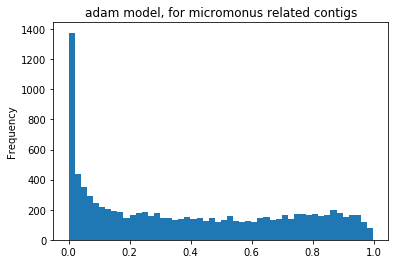

In [62]:
df_micromonus["1M_prediction"].plot.hist(bins=50, title='adam model, for micromonus related contigs')

### Older model with 300K segments by QP

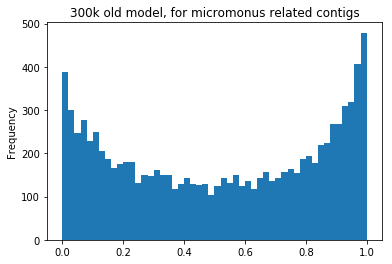

In [63]:
df_micromonus['100k_prediction'].plot.hist(bins=50, title='300k old model, for micromonus related contigs')

## All TARA contigs, with updated model  using 100K training segments

Text(0, 0.5, 'number of contigs')

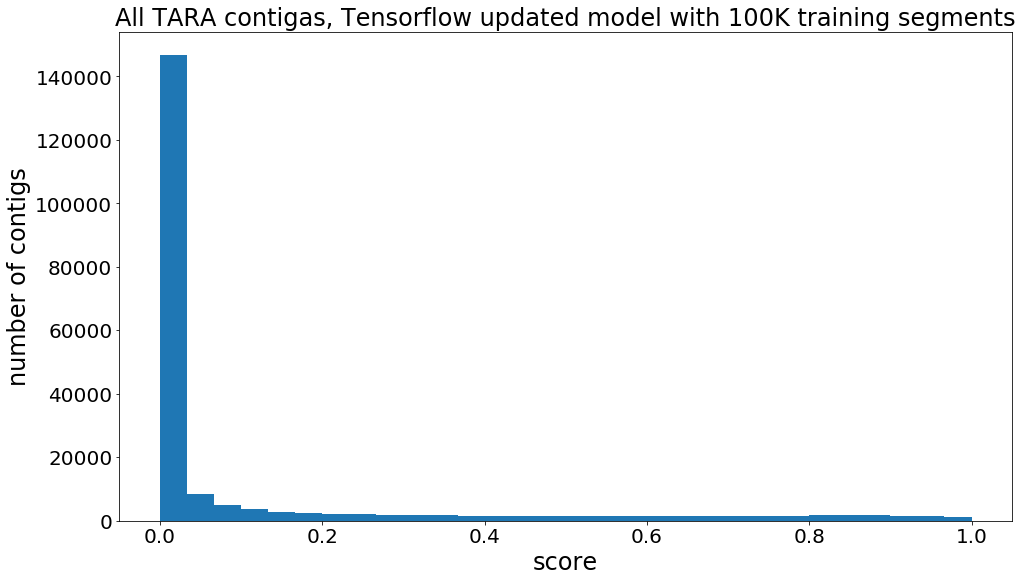

In [64]:
fig = plt.figure(figsize=(16,9))
ax0 = fig.add_subplot(111)
n_bins = 30
#colors = ['red', 'blue', 'grey']
x_multi = [new_table_300k_adam_joined[new_table_300k_adam_joined['1M_prediction']>0]['1M_prediction']]
ax0.hist(x_multi, n_bins, histtype='bar')
ax0.set_title('All TARA contigas, Tensorflow updated model with 100K training segments',fontsize=24)
ax0.set_xlabel('score',fontsize=24)
ax0.tick_params(labelsize=20)
ax0.set_ylabel('number of contigs',fontsize=24)



## "nonvirus" TARA contigs, with updated model using 100K training segments 

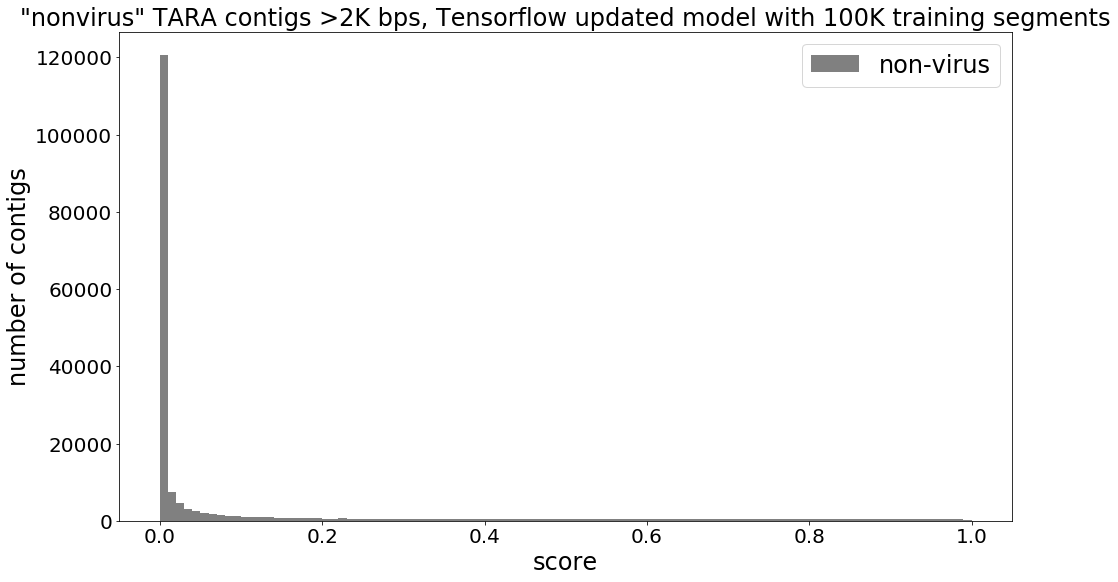

In [65]:
fig = plt.figure(figsize=(16,9))
ax0 = fig.add_subplot(111)
n_bins = 100
#colors = ['red', 'blue', 'grey']
x_multi = [df_nonvirus[df_nonvirus['1M_prediction']>0]['1M_prediction']]
ax0.hist(x_multi, n_bins, histtype='bar',  label=[
                                                  'non-virus'],
         color=['grey'])
ax0.set_title('"nonvirus" TARA contigs >2K bps, Tensorflow updated model with 100K training segments',fontsize=24)
ax0.set_xlabel('score',fontsize=24)
ax0.tick_params(labelsize=20)
ax0.set_ylabel('number of contigs',fontsize=24)
ax0.legend(prop={'size': 24})

## "virus" TARA contigs, with updated model using 100K training segments 

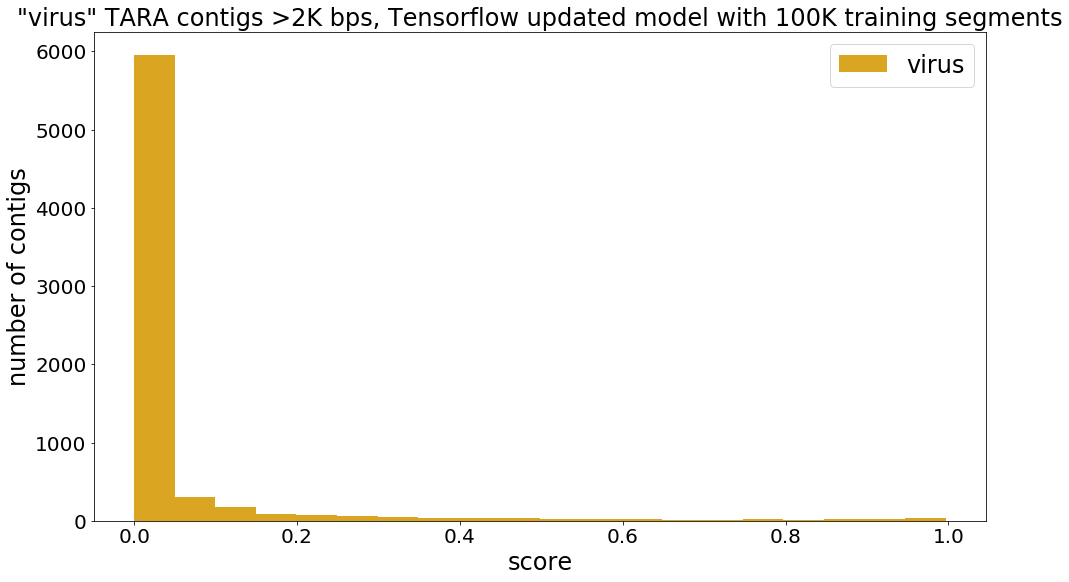

In [66]:
fig = plt.figure(figsize=(16,9))
ax0 = fig.add_subplot(111)
n_bins = 20
#colors = ['red', 'blue', 'grey']
x_multi = [df_virus[df_virus["1M_prediction"]>0]["1M_prediction"]]
ax0.hist(x_multi, n_bins, histtype='bar',  label=[
                                                  'virus'],
         color=['goldenrod'])
ax0.set_title('"virus" TARA contigs >2K bps, Tensorflow updated model with 100K training segments',fontsize=24)
ax0.set_xlabel('score',fontsize=24)
ax0.tick_params(labelsize=20)
ax0.set_ylabel('number of contigs',fontsize=24)
ax0.legend(prop={'size': 24})

## Check the distribution of probability of same number of "virus", "non-virus", 'unknown" contigs

### Balanced data, same number of "virus" and "non-virus" contigs



AttributeError: 'DataFrame' object has no attribute 'adam_prediction'

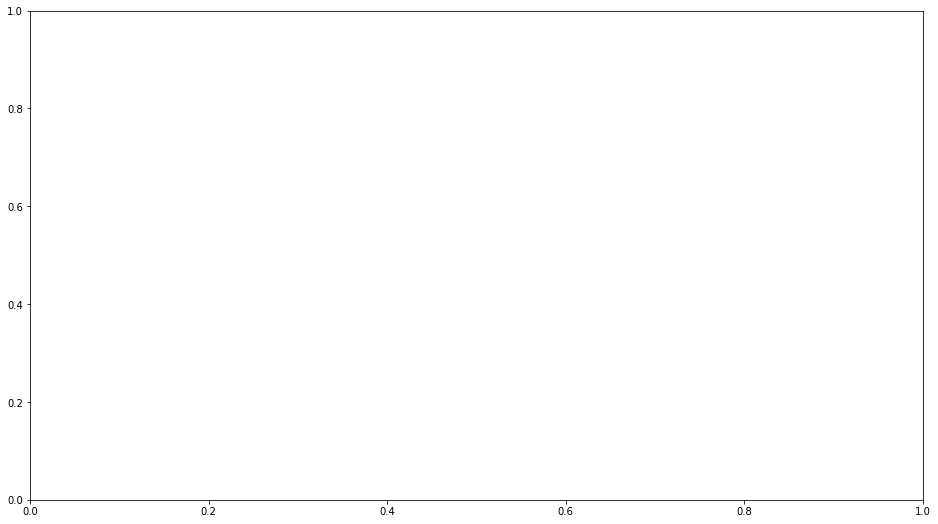

In [67]:
fig = plt.figure(figsize=(16,9))
ax0 = fig.add_subplot(111)
n_bins = 10
#colors = ['red', 'blue', 'grey']
x_multi = [df_nonvirus_subsample.adam_prediction,df_virus.adam_prediction, df_unknown_subsample.adam_prediction ]
ax0.hist(x_multi, n_bins, histtype='bar',  label=['non-virus','virus','unknown'],color=['grey', 'goldenrod', 'green'])
ax0.set_title('On balanced subsets of TARA contigs, Tensorflow updated model with 100K training segments',fontsize=24)
ax0.set_xlabel('score',fontsize=24)
ax0.tick_params(labelsize=20)
ax0.set_ylabel('number of contigs',fontsize=24)
ax0.legend(prop={'size': 24})

## Balanced TARA contigs (same number of "virus" and "non-virus")

### comparing the updated model with 100K training segments and old model with 300K training segments

In [ ]:
fig = plt.figure(figsize=(16,9))
ax0 = fig.add_subplot(111)
n_bins = 10
#colors = ['red', 'blue', 'grey']
x_multi = [df_nonvirus_subsample['300k_prediction'],df_nonvirus_subsample.adam_prediction,df_virus['300k_prediction'],
           df_virus.adam_prediction,df_unknown_subsample['300k_prediction'],df_unknown_subsample.adam_prediction ]
ax0.hist(x_multi, n_bins, histtype='bar',  label=['non-virus_old_300k','non-virus-updated_100k',
                                                  'virus_old_300k','virus_updated_100k',
                                                  'unknown_old_300k','unknown_updated_100k'],
         color=['lightgrey','grey', 'wheat','goldenrod', 'lightgreen','green'])
ax0.set_title('On balanced subsets of TARA contigs',fontsize=24)
ax0.set_xlabel('score',fontsize=24)
ax0.set_ylabel('number of contigs',fontsize=24)
ax0.tick_params(labelsize=20)
ax0.legend(prop={'size': 24})